# Support Vector Machines - Parkinson Classification Task

## Import libraries, modules and datasets

In [3]:
import requests
functions_urls = ['https://raw.githubusercontent.com/cpappas18/Dysarthria-Classifier/main/smote.py',
                  'https://raw.githubusercontent.com/cpappas18/Dysarthria-Classifier/main/performance_report.py']
functions_names = ['smote.py', 'performance_report.py']

for i in range(len(functions_names)):
  r = requests.get(functions_urls[i])
  with open(functions_names[i], 'w') as f:
    f.write(r.text)

from smote import smote_binary
from performance_report import performance_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import pickle

## Prediction Function

In [14]:
def svm_prediction(dataset_url):

  # Read dataset
  df = pd.read_csv(dataset_url)

  # Augment the data
  aug_df = smote_binary(df) #augmented dataframe

  # Feature Matrix and Target Vector
  y = aug_df['Status']
  X = aug_df.drop(['Status'], axis=1)

  # Split training and testing set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

  # Grid Search of best hyperparameters - takes a couple minutes to run
  parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001],
                     'C': [1, 10, 100]},
              {'kernel': ['linear'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100], 
                     'gamma': [0.1, 0.01, 0.001],
                     'degree': [2, 3, 4]}]

  svc = svm.SVC()
  grid = GridSearchCV(svc, parameters, n_jobs=-1) #n_job=-1 - use all processors available
  grid.fit(X_train, y_train)
  print(grid.best_params_) #best parameters
  # best = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

  # best model
  best_model = svm.SVC(**grid.best_params_).fit(X_train,y_train)
  y_pred = best_model.predict(X_test)

  return best_model, X, y, X_test, y_test, y_pred
 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


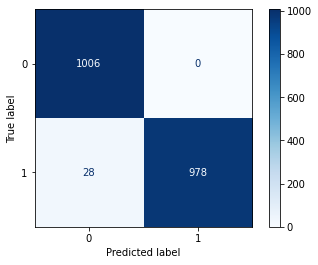

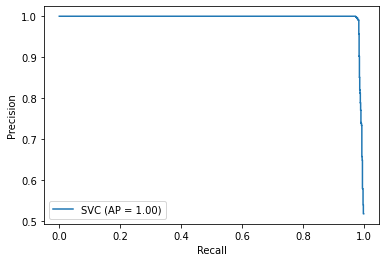

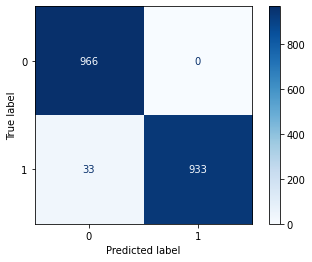

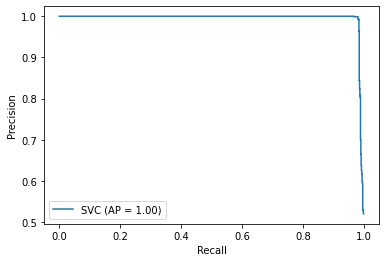

In [15]:
urls = ['https://raw.githubusercontent.com/cpappas18/Dysarthria-Classifier/main/data/PD_median_std_all_datasets.csv', 
        'https://raw.githubusercontent.com/cpappas18/Dysarthria-Classifier/main/data/PD_remove_std_all_datasets.csv']
titles = ['Prediction for PD Median dataset', 'Prediction for PD removed NaNs dataset']
model_filename = ['FinalModel_PD_median_std.sav', 'FinalModel_PD_removed_std.sav']
for i in range(len(urls)):
  model, X, y, X_test, y_test, y_pred = svm_prediction(urls[i])
  performance_report(model, X, y, X_test, y_test, y_pred, titles[i]) 
  pickle.dump(model, open(model_filename[i], 'wb'))

# takes 18 min to run